### Machine Learning Model

In [46]:
# Import dependencies
from splinter import Browser
from splinter.exceptions import ElementDoesNotExist
from selenium.webdriver import ActionChains
from bs4 import BeautifulSoup as bs
import requests
import pandas as pd
import time
from selenium import webdriver
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
%matplotlib inline
import numpy as np


from selenium.webdriver.support.ui import Select
driver = webdriver.Chrome()
from selenium.webdriver.common.by import By
from sqlalchemy import create_engine
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy import Column, Integer, String, Float
from sqlalchemy.orm import Session
from mysql_conn import password
import datetime
import os

In [50]:
car_sales_df = pd.read_excel('combined-feat-sales_v2.xlsx')
car_sales_df

,Axander-Model,id,year,model,fuel_type,vehicle_class,displ,cyl,trans,drive,smog_rating,city_mpg,hwy_mpg,cmb_mpg,Greenhouse_gas_score,smartway,comb_CO2,Sales_2016,Sales_2017,Sales_2018
0,BMW 7-series,272,2016,BMW 740i,Gasoline,large car,3.0,6.0,SemiAuto-8,2WD,6,21.0,29.0,24.0,5,No,371.0,12071,8731,7909
1,BMW 7-series,273,2016,BMW 740i,Gasoline,large car,3.0,6.0,SemiAuto-8,2WD,6,21.0,29.0,24.0,5,No,371.0,12071,8731,7909
2,BMW 7-series,274,2016,BMW 750i,Gasoline,large car,4.4,8.0,SemiAuto-8,2WD,5,17.0,25.0,20.0,4,No,436.0,12071,8731,7909
3,BMW 7-series,275,2016,BMW 750i,Gasoline,large car,4.4,8.0,SemiAuto-8,2WD,6,17.0,25.0,20.0,4,No,436.0,12071,8731,7909
4,BMW 7-series,276,2016,BMW 750i,Gasoline,large car,4.4,8.0,SemiAuto-8,4WD,5,16.0,25.0,19.0,4,No,459.0,12071,8731,7909
5,BMW 7-series,277,2016,BMW 750i,Gasoline,large car,4.4,8.0,SemiAuto-8,4WD,6,16.0,25.0,19.0,4,No,459.0,12071,8731,7909
6,Chevrolet Colorado,487,2016,CHEVROLET Colorado,Gasoline,pickup,2.5,4.0,Auto-6,2WD,6,20.0,27.0,22.0,5,No,397.0,103217,106583,20848
7,Chevrolet Colorado,488,2016,CHEVROLET Colorado,Gasoline,pickup,2.5,4.0,Auto-6,2WD,6,20.0,27.0,22.0,5,No,397.0,103217,106583,20848
8,Chevrolet Colorado,489,2016,CHEVROLET Colorado,Gasoline,pickup,2.5,4.0,Auto-6,4WD,6,19.0,25.0,21.0,5,No,426.0,103217,106583,20848
9,Chevrolet Colorado,490,2016,CHEVROLET Colorado,Gasoline,pickup,2.5,4.0,Auto-6,4WD,6,19.0,25.0,21.0,5,No,426.0,103217,106583,20848


In [52]:
car_sales = car_sales_df.copy()
car_sales = car_sales.fillna('0')
car_sales_clean = car_sales.copy()
car_sales_clean = car_sales_clean.drop(['Axander-Model', 'id'], axis=1)
 

car_sales_clean

,year,model,fuel_type,vehicle_class,displ,cyl,trans,drive,smog_rating,city_mpg,hwy_mpg,cmb_mpg,Greenhouse_gas_score,smartway,comb_CO2,Sales_2016,Sales_2017,Sales_2018
0,2016,BMW 740i,Gasoline,large car,3,6,SemiAuto-8,2WD,6,21.0,29.0,24.0,5,No,371.0,12071,8731,7909
1,2016,BMW 740i,Gasoline,large car,3,6,SemiAuto-8,2WD,6,21.0,29.0,24.0,5,No,371.0,12071,8731,7909
2,2016,BMW 750i,Gasoline,large car,4.4,8,SemiAuto-8,2WD,5,17.0,25.0,20.0,4,No,436.0,12071,8731,7909
3,2016,BMW 750i,Gasoline,large car,4.4,8,SemiAuto-8,2WD,6,17.0,25.0,20.0,4,No,436.0,12071,8731,7909
4,2016,BMW 750i,Gasoline,large car,4.4,8,SemiAuto-8,4WD,5,16.0,25.0,19.0,4,No,459.0,12071,8731,7909
5,2016,BMW 750i,Gasoline,large car,4.4,8,SemiAuto-8,4WD,6,16.0,25.0,19.0,4,No,459.0,12071,8731,7909
6,2016,CHEVROLET Colorado,Gasoline,pickup,2.5,4,Auto-6,2WD,6,20.0,27.0,22.0,5,No,397.0,103217,106583,20848
7,2016,CHEVROLET Colorado,Gasoline,pickup,2.5,4,Auto-6,2WD,6,20.0,27.0,22.0,5,No,397.0,103217,106583,20848
8,2016,CHEVROLET Colorado,Gasoline,pickup,2.5,4,Auto-6,4WD,6,19.0,25.0,21.0,5,No,426.0,103217,106583,20848
9,2016,CHEVROLET Colorado,Gasoline,pickup,2.5,4,Auto-6,4WD,6,19.0,25.0,21.0,5,No,426.0,103217,106583,20848


In [53]:
car_sales_clean.describe()

,year,smog_rating,city_mpg,hwy_mpg,cmb_mpg,Greenhouse_gas_score,comb_CO2,Sales_2016,Sales_2017,Sales_2018
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,2017.031373,5.407843,21.617647,26.382353,23.266667,4.170588,439.409804,173989.580392,175896.925490,66592.145098
std,0.816695,1.574083,19.663947,14.913005,17.298701,1.663286,110.348861,176631.523989,181628.055205,76425.495021
min,2016.000000,3.000000,13.000000,15.000000,14.000000,1.000000,0.000000,609.000000,529.000000,1148.000000
25%,2016.000000,5.000000,15.000000,20.000000,17.000000,3.000000,411.500000,26544.250000,30047.000000,5758.750000
50%,2017.000000,6.000000,17.000000,23.000000,19.000000,4.000000,459.000000,108257.000000,109657.000000,30244.000000
75%,2018.000000,6.000000,20.000000,26.000000,22.000000,5.000000,502.000000,207299.000000,204211.000000,94829.000000
max,2018.000000,10.000000,126.000000,103.000000,114.000000,10.000000,615.000000,537013.000000,550311.000000,228947.000000


In [54]:
car_sales_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 510 entries, 0 to 509
Data columns (total 18 columns):
year                    510 non-null int64
model                   510 non-null object
fuel_type               510 non-null object
vehicle_class           510 non-null object
displ                   510 non-null object
cyl                     510 non-null object
trans                   510 non-null object
drive                   510 non-null object
smog_rating             510 non-null int64
city_mpg                510 non-null float64
hwy_mpg                 510 non-null float64
cmb_mpg                 510 non-null float64
Greenhouse_gas_score    510 non-null int64
smartway                510 non-null object
comb_CO2                510 non-null float64
Sales_2016              510 non-null int64
Sales_2017              510 non-null int64
Sales_2018              510 non-null int64
dtypes: float64(4), int64(6), object(8)
memory usage: 71.8+ KB


In [55]:
car_sales_clean.isnull().sum()

year                    0
model                   0
fuel_type               0
vehicle_class           0
displ                   0
cyl                     0
trans                   0
drive                   0
smog_rating             0
city_mpg                0
hwy_mpg                 0
cmb_mpg                 0
Greenhouse_gas_score    0
smartway                0
comb_CO2                0
Sales_2016              0
Sales_2017              0
Sales_2018              0
dtype: int64

In [56]:
car_sales_sliced = car_sales_clean.copy()
bins = (3,23,50,114)
group_names = ['low-mpg','medium-mpg','high-mpg']
car_sales_sliced['cmb_mpg'] = pd.cut(car_sales_sliced['cmb_mpg'],bins = bins,labels = group_names)

In [57]:
car_sales_sliced

,year,model,fuel_type,vehicle_class,displ,cyl,trans,drive,smog_rating,city_mpg,hwy_mpg,cmb_mpg,Greenhouse_gas_score,smartway,comb_CO2,Sales_2016,Sales_2017,Sales_2018
0,2016,BMW 740i,Gasoline,large car,3,6,SemiAuto-8,2WD,6,21.0,29.0,medium-mpg,5,No,371.0,12071,8731,7909
1,2016,BMW 740i,Gasoline,large car,3,6,SemiAuto-8,2WD,6,21.0,29.0,medium-mpg,5,No,371.0,12071,8731,7909
2,2016,BMW 750i,Gasoline,large car,4.4,8,SemiAuto-8,2WD,5,17.0,25.0,low-mpg,4,No,436.0,12071,8731,7909
3,2016,BMW 750i,Gasoline,large car,4.4,8,SemiAuto-8,2WD,6,17.0,25.0,low-mpg,4,No,436.0,12071,8731,7909
4,2016,BMW 750i,Gasoline,large car,4.4,8,SemiAuto-8,4WD,5,16.0,25.0,low-mpg,4,No,459.0,12071,8731,7909
5,2016,BMW 750i,Gasoline,large car,4.4,8,SemiAuto-8,4WD,6,16.0,25.0,low-mpg,4,No,459.0,12071,8731,7909
6,2016,CHEVROLET Colorado,Gasoline,pickup,2.5,4,Auto-6,2WD,6,20.0,27.0,low-mpg,5,No,397.0,103217,106583,20848
7,2016,CHEVROLET Colorado,Gasoline,pickup,2.5,4,Auto-6,2WD,6,20.0,27.0,low-mpg,5,No,397.0,103217,106583,20848
8,2016,CHEVROLET Colorado,Gasoline,pickup,2.5,4,Auto-6,4WD,6,19.0,25.0,low-mpg,5,No,426.0,103217,106583,20848
9,2016,CHEVROLET Colorado,Gasoline,pickup,2.5,4,Auto-6,4WD,6,19.0,25.0,low-mpg,5,No,426.0,103217,106583,20848


In [59]:
car_sales_sliced['cmb_mpg'].unique()

[medium-mpg, low-mpg, high-mpg]
Categories (3, object): [low-mpg < medium-mpg < high-mpg]

In [60]:
lb = LabelEncoder()

In [63]:
car_sales_encoded = car_sales_sliced.copy()
car_sales_encoded['cmb_mpg']= lb.fit_transform(car_sales_encoded['cmb_mpg'])
car_sales_encoded['model']= lb.fit_transform(car_sales_encoded['model'])    
car_sales_encoded['fuel_type']= lb.fit_transform(car_sales_encoded['fuel_type'])
car_sales_encoded['vehicle_class']= lb.fit_transform(car_sales_encoded['vehicle_class'])
car_sales_encoded['trans']= lb.fit_transform(car_sales_encoded['trans'])
car_sales_encoded['drive']= lb.fit_transform(car_sales_encoded['drive'])
car_sales_encoded['smartway']= lb.fit_transform(car_sales_encoded['smartway'])

car_sales_encoded.head()

,year,model,fuel_type,vehicle_class,displ,cyl,trans,drive,smog_rating,city_mpg,hwy_mpg,cmb_mpg,Greenhouse_gas_score,smartway,comb_CO2,Sales_2016,Sales_2017,Sales_2018
0,2016,1,3,0,3,6,9,0,6,21.0,29.0,2,5,1,371.0,12071,8731,7909
1,2016,1,3,0,3,6,9,0,6,21.0,29.0,2,5,1,371.0,12071,8731,7909
2,2016,2,3,0,4.4,8,9,0,5,17.0,25.0,1,4,1,436.0,12071,8731,7909
3,2016,2,3,0,4.4,8,9,0,6,17.0,25.0,1,4,1,436.0,12071,8731,7909
4,2016,2,3,0,4.4,8,9,1,5,16.0,25.0,1,4,1,459.0,12071,8731,7909


In [64]:
car_sales_encoded['cmb_mpg'].value_counts()

1    411
2     81
0     18
Name: cmb_mpg, dtype: int64

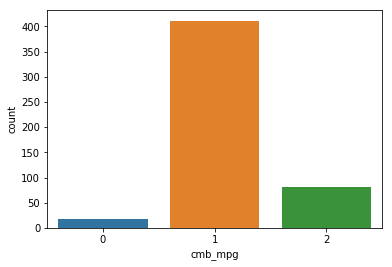

In [65]:
sns.countplot(car_sales_encoded['cmb_mpg'])

In [66]:
# Sepearate dataset
car_sales_ml = car_sales_encoded.copy()
X = car_sales_ml.drop('cmb_mpg', axis=1)
y = car_sales_ml['cmb_mpg']

In [67]:
# Train and test 
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.2, random_state = 42)



In [68]:
# Apply Standard scaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [69]:
X_train[:10]

array([[-3.92709818e-02,  1.63146529e+00,  3.87783367e-01,
        -3.50809926e-01, -6.81489451e-01, -1.02691700e+00,
         3.87622099e-01,  1.07115285e+00,  1.00020386e+00,
        -1.31049663e-01, -3.59189551e-01, -1.00153788e-01,
        -5.86786793e-02,  7.38264638e-02,  1.29369880e-02,
         3.69816088e-02,  2.11775127e+00],
       [ 1.19323368e+00, -1.25155210e+00, -3.56760698e+00,
        -3.50809926e-01, -6.15570130e-01, -1.02691700e+00,
        -7.58391063e-01, -9.33573582e-01, -1.54237045e+00,
         2.37812131e-02,  2.52991480e-01, -1.00153788e-01,
        -5.86786793e-02, -2.41437263e-01, -4.09912391e-01,
        -3.92537552e-01, -6.10319923e-01],
       [ 1.19323368e+00,  1.29228677e+00, -2.24914353e+00,
         1.01885945e+00, -2.46131112e+00, -3.08579729e+00,
        -1.52239984e+00, -9.33573582e-01,  2.90713460e+00,
         4.66870751e+00,  4.40221846e+00,  3.45312844e+00,
        -3.47880742e+00, -3.96154924e+00, -9.83088728e-01,
        -9.68914527e-01, -8.6

# Random Forest Classifer

In [95]:
rfc = RandomForestClassifier(n_estimators = 200)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

In [96]:
pred_rfc[:20]

array([0, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 2],
      dtype=int64)

In [97]:
# How well model performed
print(classification_report(y_test,pred_rfc))
print(confusion_matrix(y_test,pred_rfc))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00         4
          1       1.00      0.99      0.99        84
          2       0.93      1.00      0.97        14

avg / total       0.99      0.99      0.99       102

[[ 4  0  0]
 [ 0 83  1]
 [ 0  0 14]]


# SVM Classifier

In [98]:
clf = svm.SVC()
clf.fit(X_train,y_train)
pred_clf = clf.predict(X_test)
pred_clf[:20]

array([0, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 2],
      dtype=int64)

In [99]:
# How well model performed
print(classification_report(y_test,pred_clf))
print(confusion_matrix(y_test,pred_clf))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00         4
          1       0.98      1.00      0.99        84
          2       1.00      0.86      0.92        14

avg / total       0.98      0.98      0.98       102

[[ 4  0  0]
 [ 0 84  0]
 [ 0  2 12]]


# Neural Network

In [100]:
mplc = MLPClassifier(hidden_layer_sizes=(17,17,17),max_iter=700)
mplc.fit(X_train,y_train)
pred_mlpc = mplc.predict(X_test)
pred_mlpc[:20]

array([0, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 2],
      dtype=int64)

In [101]:
# How well model performed
print(classification_report(y_test,pred_mlpc))
print(confusion_matrix(y_test,pred_mlpc))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00         4
          1       1.00      1.00      1.00        84
          2       1.00      1.00      1.00        14

avg / total       1.00      1.00      1.00       102

[[ 4  0  0]
 [ 0 84  0]
 [ 0  0 14]]


In [103]:
from sklearn.metrics import accuracy_score
cm_rfc = accuracy_score(y_test,pred_rfc)
cm_clf = accuracy_score(y_test,pred_clf)
cm_mlpc = accuracy_score(y_test,pred_mlpc)
print(f'CM RFC Score: {cm_rfc}')
print(f'CM CLF Score: {cm_clf}')
print(f'CM MLPC Score: {cm_mlpc}')

CM RFC Score: 0.9901960784313726
CM CLF Score: 0.9803921568627451
CM MLPC Score: 1.0


# Discussion
* The Neural Network MPLC received the best CM accuracy score. The MPLC model correctly predicted whether car type is low-mpg, medium-mpg, high-mpg 100% of the time.
* The Random Forest RFC received the next best CM accuracy score. The RFC correctly predicted low-mpg and high-mpg 100% of the time. But mislabled 1 high-mpg.
* Lastly, the SVM model received a 98% accuracy score. The SVM correctly predicted low-mpg and medium-mpg 100% of the time but mislabled 2 high-mpgs

# A Step Further
* Test model against new data the model has never seen

In [104]:
car_sales_encoded.head()

,year,model,fuel_type,vehicle_class,displ,cyl,trans,drive,smog_rating,city_mpg,hwy_mpg,cmb_mpg,Greenhouse_gas_score,smartway,comb_CO2,Sales_2016,Sales_2017,Sales_2018
0,2016,1,3,0,3,6,9,0,6,21.0,29.0,2,5,1,371.0,12071,8731,7909
1,2016,1,3,0,3,6,9,0,6,21.0,29.0,2,5,1,371.0,12071,8731,7909
2,2016,2,3,0,4.4,8,9,0,5,17.0,25.0,1,4,1,436.0,12071,8731,7909
3,2016,2,3,0,4.4,8,9,0,6,17.0,25.0,1,4,1,436.0,12071,8731,7909
4,2016,2,3,0,4.4,8,9,1,5,16.0,25.0,1,4,1,459.0,12071,8731,7909


In [107]:
Xnew = [[2017,5,2,1,4.4,6,8,1,3,22.0,29.9,4,2,436.0,1407,8835,7909]]
Xnew = sc.transform(Xnew)
ynew = mplc.predict(Xnew)
ynew

array([2], dtype=int64)

## Discussion
* Based on the new X values, the MPLC model predicts this is a medium-mpg car

# Linear Regression